In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")


In [3]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
df = df.drop(['Serial No.'], axis=1)

In [5]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Luckily there are no missing values in the dataset.

In [6]:
df.duplicated().sum()

0

#### No duplicate values either.

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Distribution of the parameters

c:\Users\mylie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


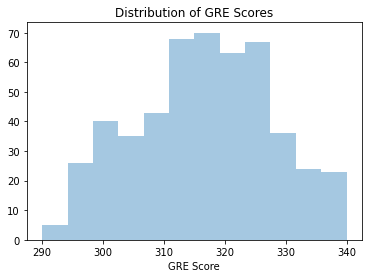

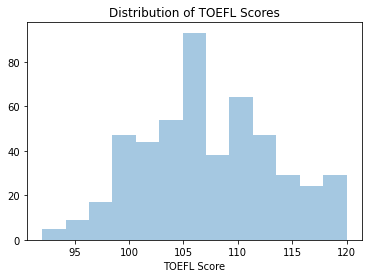

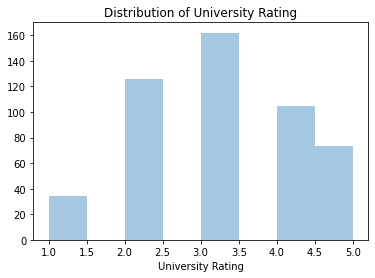

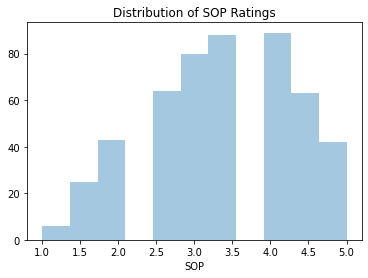

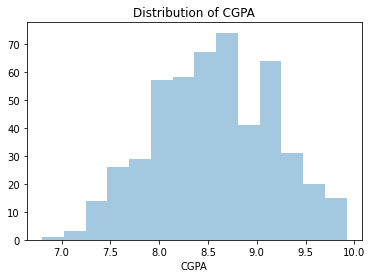

In [8]:
import seaborn as sns

fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

#### Relation between GRE and TOEFL scores

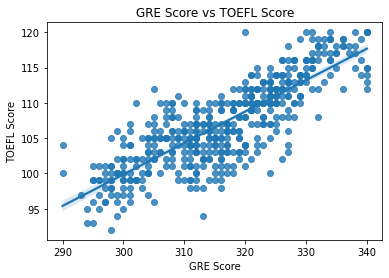

In [9]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

#### This shows students with higher gre scores also have high toefl scores.

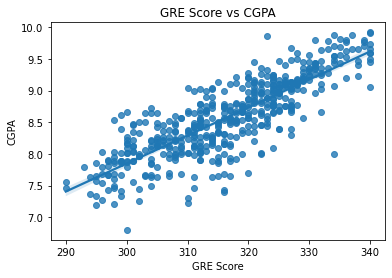

In [10]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

#### Similarly, students with good cgpa have high gre scores too.

### Correlation among features and label

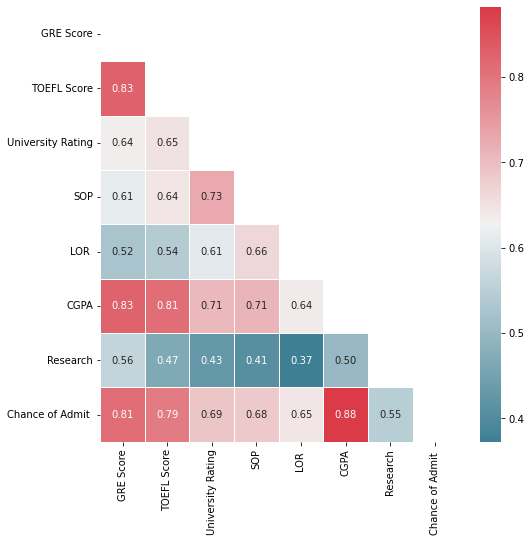

In [11]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

#### Setting X and y values as input and target values

In [12]:
X = df.drop(['Chance of Admit '], axis=1)
y = df[['Chance of Admit ']]

#### Splitting data into train and test

In [14]:
from sklearn.model_selection import train_test_split
import random
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

### Comparing different algorithms with each other

In [15]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

DecisionTree : 0.08336426092757016
Linear Regression : 0.05937931583482652
RandomForest : 0.062198229556796866
KNeighbours : 0.07789351706015077
SVM : 0.07744595425564625
AdaBoostClassifier : 0.06698068000131686
GradientBoostingClassifier:  0.06021715805411979
Xgboost:  0.06554337564178242
Lasso:  0.11284747196083099
Ridge:  0.059296042743980475
BayesianRidge:  0.05924663354696218
ElasticNet:  0.08702229216983684
HuberRegressor:  0.06351617388502996


### Looks like Linear Regression performs the best here compared to others using MSE as evaluation metric.

#### So, we will use linear regression to get our results

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(X_train,y_train)

LinearRegression()

In [18]:
pred = reg.predict(X_test)

In [19]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,324,105,3,3.0,4.0,8.75,0
483,304,103,5,5.0,3.0,7.92,0
27,298,98,2,1.5,2.5,7.50,1
50,313,98,3,2.5,4.5,8.30,1
442,331,116,4,4.5,4.5,9.44,1
...,...,...,...,...,...,...,...
234,330,113,5,5.0,4.0,9.31,1
79,294,93,1,1.5,2.0,7.36,0
348,302,99,1,2.0,2.0,7.25,0
353,300,102,3,3.5,2.5,8.17,0


In [20]:
y_test

,Chance of Admit
153,0.79
483,0.71
27,0.44
50,0.76
442,0.92
...,...
234,0.91
79,0.46
348,0.57
353,0.63


#### Test Cases

In [21]:
user_input = [[330,116,4,4,5,8.6,1]] 
user_pred = reg.predict(user_input)
print((user_pred.flatten()*100).astype(float))

[81.70378397]


### Feature Importance

In [22]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

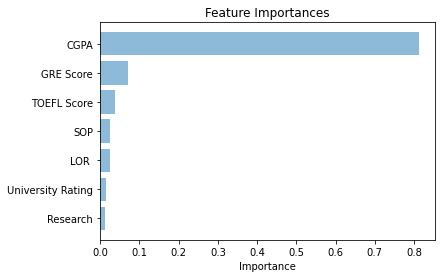

In [23]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

### CGPA plays a significant major role for this prediction according to the plot.

In [24]:
import pickle
pickle.dump(reg,open('new_model.pkl','wb'))